In [45]:
# utilizado para la manipulación de directorios y rutas
import os
import pandas as pd
# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [46]:
def csvAdapted(dataset, dropColumns):  #indice de columnas que aliminare
    data = pd.read_csv(dataset, encoding='latin-1')  #evita problemas con caracteres especiales

    data = data.drop(data.columns[dropColumns], axis=1)
    data = data.dropna() #elimina filas con valores nulos

    print(data.head())  # para imprimir el dataset

    return data.to_numpy()

data = csvAdapted("/content/train.csv", [1025])  # elimina la columna 1025

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     212       1      77     204     137     117     139     161   
1      0       0      19       3     233     127       0      70       1   
2      1       0     181     232       0       0     141     133     255   
3      5     130     109     153     224      84      51     235     254   
4      1      81     141     255     232       0     198     247     221   

   pixel9  ...  pixel1015  pixel1016  pixel1017  pixel1018  pixel1019  \
0     199  ...          0          0          0          0          0   
1     233  ...        225        104         28        233        150   
2     221  ...         58        116        223        203        183   
3      64  ...         31        183        113        255        113   
4       0  ...         34         61         69         36         48   

   pixel1020  pixel1021  pixel1022  pixel1023  pixel1024  
0          0          0          0          0

In [47]:
X = data[:, 1:]
y = data[:, 0]
m = y.size
print(y)

[3 0 1 ... 6 2 6]


In [48]:
# data.shape
X.shape[1]

1024

In [49]:
input_layer_size  = 1024
num_labels = 10
m = y.size

In [59]:
def calcularSigmoide(z):  #probabilidad de que z pertenezca a la clase positiva
    # Calcula la sigmoide de z.

    return 1.0 / (1.0 + np.exp(-z))

In [60]:
def calcularCosto(theta, X, y, lambda_): #calcula el error del entrenamiento
    # Inicializa algunos valores utiles
    m = y.size #num ejemplos de entrenamiento

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0 #costo y gradiente
    grad = np.zeros(theta.shape)

    h = calcularSigmoide(X.dot(theta.T))
#crea una copia de theta
    temp = theta
    temp[0] = 0 #excluye el termino de sesgo de la regularizacion
#funcion de costo de regresion logistica sin regularizar, termino de regularizacion
#m num de ejemplos, y etiquetas, h predicciones, lambda es el parametro de regularizacion
#temp copia de los parametros del modelo theta
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
#croosentropy
    grad = (1 / m) * (h - y).dot(X)
    # Se aplica regularizacion en la siguiente linea
    grad = grad + (lambda_ / m) * temp

    return J, grad

    #costo

In [61]:
# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba para las entradas
X_t = np.concatenate((np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0), axis=1)
print(X_t)
# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

# valores de testeo para el parametro de regularizacion
lambda_t = 3

[[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]


In [53]:
J, grad = calcularCosto(theta_t, X_t, y_t, lambda_t)

print('Costo         : {:.6f}'.format(J))
print('Costo esperadot: 2.534819')
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Costo         : 2.534819
Costo esperadot: 2.534819
-----------------------
Gradientes:
 [0.146561, -0.548558, 0.724722, 1.398003]
Gradientes esperados:
 [0.146561, -0.548558, 0.724722, 1.398003]


In [62]:
def oneVsAll(X, y, num_labels, lambda_): #funcion para entrenar el modelo

    m, n = X.shape  #m ejemplos de entrenamiento, n caracteristicas x

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)


    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1) #se inician los parametros del modelo theta con 0
        options = {'maxiter': 50}               #num de iteraciones
        res = optimize.minimize(calcularCosto,   #encontrar parametros queminimizen fc
                                initial_theta,
                                (X, (y == (c + 1)), lambda_),
                                jac=True, #devuelve costo y gradiente
                                method='BFGS', #descenso por el gradiente conjugado
                                options=options)

        all_theta[c] = res.x  #parametros del modelo optmizados para cada calsificador y clase

    return all_theta

In [63]:
lambda_ = 0.001
all_theta = oneVsAll(X, y, num_labels, lambda_)

<ipython-input-59-4ee9b05c53d4>:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
<ipython-input-60-d2b1bfbf3a96>:19: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-60-d2b1bfbf3a96>:19: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-59-4ee9b05c53d4>:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
<ipython-input-60-d2b1bfbf3a96>:19: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-59-4ee9b05c53d4>:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
<ipython-input-60-d2b1bfbf3a96>:19: RuntimeWar

In [24]:
print(all_theta)

[[-1.01788258e-02 -5.53464871e-05  1.52488856e-04 ... -5.60748737e-04
  -7.57902428e-04 -3.05169132e-04]
 [ 9.85567273e-02  3.09148107e-03  1.86509524e-03 ...  4.54699117e-03
   2.81910764e-03  1.54033866e-03]
 [-4.33622795e-03 -2.87497123e-03  9.44465819e-04 ... -5.93444193e-03
  -2.76094970e-03 -1.62747530e-03]
 ...
 [-1.44220446e-02 -9.40870696e-03 -2.78061834e-03 ... -2.79993017e-03
   1.91730141e-03 -3.81847913e-03]
 [-4.80485436e-05 -1.33954535e-03 -1.51112819e-03 ... -2.65390485e-05
  -1.61966291e-03 -2.13044945e-03]
 [-2.98402638e-04 -2.67247164e-02 -2.96871061e-02 ... -2.63948232e-02
  -2.81775235e-02 -2.68040468e-02]]


In [38]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(calcularSigmoide(X.dot(all_theta.T)), axis = 1) #devuelve el valor max a lo largo de un eje que corresponde a las columnas

    return p + 1


In [44]:
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))

# Cargar datos test
data_test = csvAdapted("/content/test.csv", [1025])

# Separar datos y etiquetas
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

# Realiza predicciones en tus datos de prueba
pred_test = predictOneVsAll(all_theta, X_test)

# Calcula la precisión en tus datos de prueba
print('Precisión del conjunto de prueba: {:.2f}%'.format(np.mean(pred_test == y_test) * 100))

<ipython-input-18-b4b3dba6631b>:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


Precision del conjuto de entrenamiento: 79.64%
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0     199      51      23       0       0     227     255   
1      6       0       0       4      24      56      93     220     101   
2      9     116     139     255     244     252     137     139     139   
3      1      64     195       0      80       0     200     139      51   
4      7     255       4       0      73       3      15       0      48   

   pixel9  ...  pixel1015  pixel1016  pixel1017  pixel1018  pixel1019  \
0     127  ...          0          0          0          0          0   
1      80  ...         97         72        142        247          1   
2     255  ...        155        108         73          3        105   
3      84  ...        184         64        158          0         52   
4      15  ...         10          9          0         10         11   

   pixel1020  pixel1021  pixel1022  pixel1023  pixel1024 

<ipython-input-18-b4b3dba6631b>:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


<ipython-input-18-b4b3dba6631b>:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


Etiqueta verdadera: 7
Etiqueta predicha: [7]


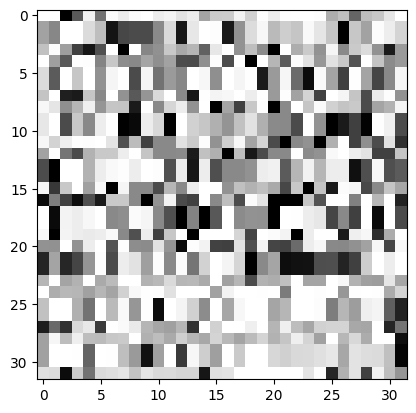

In [41]:
# Selecciona un ejemplo aleatorio del conjunto de prueba
index = np.random.choice(X_test.shape[0])
img = X_test[index]

# Realiza una predicción para este ejemplo
pred = predictOneVsAll(all_theta, img.reshape(1, -1))

# Obtiene la etiqueta verdadera para este ejemplo
true_label = y_test[index]

# Imprime la etiqueta verdadera y la etiqueta predicha
print('Etiqueta verdadera:', true_label)
print('Etiqueta predicha:', pred)

# Visualiza la imagen
img = img.reshape((32, 32))  # 32x32 píxeles
pyplot.imshow(img, cmap='Greys')
pyplot.show()
